In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Outline

Number of games per year
Number of teams per year
Points scored
-margin of vicotry total over time
-winner pts vs loser pts
-Biggests wins
Rank difference
-how to determine
-rank difference over time
Network Analysis

In [6]:
records = pd.read_csv('scraped_results_df.csv')

In [7]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48899 entries, 0 to 48898
Data columns (total 13 columns):
Unnamed: 0     48899 non-null int64
row            48899 non-null int64
week_number    48899 non-null int64
winner         48899 non-null object
winner_pts     48897 non-null float64
loser          48899 non-null object
loser_pts      48897 non-null float64
game_date      48899 non-null object
game_time      5225 non-null object
game_day       48899 non-null object
game_loc       17923 non-null object
notes          4066 non-null object
year           48899 non-null int64
dtypes: float64(2), int64(4), object(7)
memory usage: 4.9+ MB


In [8]:
records.describe()

,Unnamed: 0,row,week_number,winner_pts,loser_pts,year
count,48899.000000,48899.000000,48899.000000,48897.000000,48897.000000,48899.000000
mean,360.076361,361.076361,7.479539,31.192159,13.981389,1985.805047
std,215.386657,215.386657,3.950671,13.186025,9.711082,19.962510
min,0.000000,1.000000,1.000000,0.000000,0.000000,1950.000000
25%,177.000000,178.000000,4.000000,21.000000,7.000000,1969.000000
50%,354.000000,355.000000,7.000000,30.000000,13.000000,1985.000000
75%,531.000000,532.000000,10.000000,40.000000,20.000000,2004.000000
max,883.000000,884.000000,21.000000,100.000000,72.000000,2018.000000


In [10]:
records.head()

,Unnamed: 0,row,week_number,winner,winner_pts,loser,loser_pts,game_date,game_time,game_day,game_loc,notes,year
0,0,1,1,Presbyterian,13.0,Furman,12.0,"Sep 15, 1950",NaN,Fri,@,NaN,1950
1,1,2,1,Brigham Young,14.0,Idaho State,13.0,"Sep 16, 1950",NaN,Sat,@,NaN,1950
2,2,3,1,Cincinnati,32.0,Texas-El Paso,0.0,"Sep 16, 1950",NaN,Sat,NaN,NaN,1950
3,3,4,1,Citadel,56.0,Parris Island Marines,0.0,"Sep 16, 1950",NaN,Sat,NaN,NaN,1950
4,4,5,1,Drake,7.0,Denver,0.0,"Sep 16, 1950",NaN,Sat,NaN,NaN,1950


In [71]:
records = pd.read_csv('scraped_results_df.csv')
# 'game_loc' indicated where the game was played at. Since the winner is listed first in 
# the original data, the '@' indicates the game was played at the loser's home.  Therefore, 
# we can create a new column called 'Winner_home' if the '@' sign is not present.
records['winner_home'] = records['game_loc']!='@'

# The rank is included in the winner and losers name within parenthesis.  The below regex will identify 
# numerical digits within the parenthesis and extract them to a new column as 'floats'.  We'll also 
# remove the rank in parenthesis from the original winner column.  We'll do this for winners and losers.
records['winner_rank'] = records['winner'].str.extract('\(([0-9]+)\)', expand=True).astype('float')
records['winner_name'] = records['winner'].str.replace('\(([0-9]+)\)', '').str.replace('\xa0', '')
records['loser_rank'] = records['loser'].str.extract('\(([0-9]+)\)', expand=True).astype('float')
records['loser_name'] = records['loser'].str.replace('\(([0-9]+)\)', '').str.replace('\xa0', '')

# Calculate a rank_diff socre.  The more negative this is, the more of an upset it is.
records['rank_diff'] = records['loser_rank'] - records['winner_rank']

# Add a pts_diff between the two pts as we can use margin of victory to see how close a 
# game is.
records['pts_diff'] = records['winner_pts'] - records['loser_pts']

# We no longer need several of these columns, so lets drop them.  
records.drop(['Unnamed: 0', 'winner','loser'], axis=1, inplace=True)

records.set_index(['year','week_number', 'row'], inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f96e0d0>,
      dtype=object)

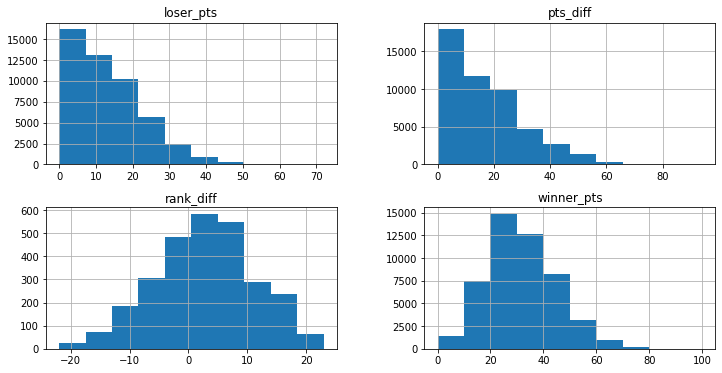

In [12]:
records[['winner_pts', 'loser_pts', 'pts_diff', 'rank_diff']].hist(figsize=(12,6))


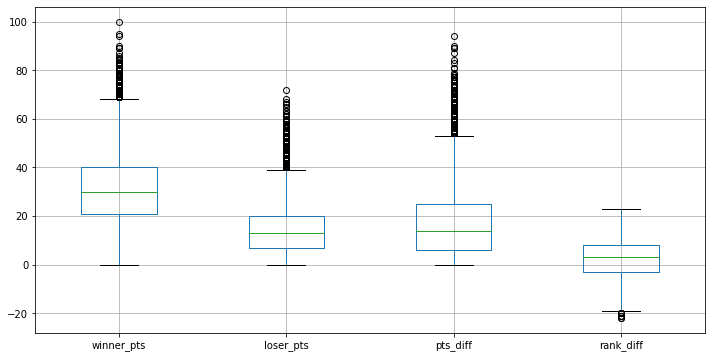

In [13]:
records[['winner_pts', 'loser_pts', 'pts_diff', 'rank_diff']].boxplot(figsize=(12,6))

In [14]:
# Biggest upsets
records[records['rank_diff'] < -18][:10]

winner_pts  loser_pts     game_date game_time game_day  \
year week_number row                                                           
1953 10          510        14.0       14.0  Nov 21, 1953       NaN      Sat   
1957 10          490         7.0        6.0  Nov 16, 1957       NaN      Sat   
1995 7           266        40.0       24.0   Oct 7, 1995       NaN      Sat   
     11          447        33.0       28.0   Nov 2, 1995       NaN      Thu   
1996 14          603        13.0        9.0  Nov 23, 1996       NaN      Sat   
2001 15          684        31.0       20.0   Dec 8, 2001       NaN      Sat   
2003 5           224        31.0       27.0  Sep 20, 2003       NaN      Sat   
     8           396        17.0       10.0  Oct 11, 2003       NaN      Sat   
     11          515        16.0       13.0   Nov 1, 2003       NaN      Sat   
     12          589        31.0       28.0   Nov 8, 2003       NaN      Sat   

                     game_loc                           notes  winner_home  \
year week_number row                                                         
1953 10          510      NaN                             NaN         True   
1957 10          490      NaN                             NaN         True   
1995 7           266        @                             NaN        False   
     11          447      NaN                             NaN         True   
1996 14          603        @                             NaN        False   
2001 15          684      NaN  SEC Championship (Atlanta, GA)         True   
2003 5           224      NaN                             NaN         True   
     8           396      NaN                             NaN         True   
     11          515      NaN                             NaN         True   
     12          589      NaN                             NaN         True   

                      winner_rank      winner_name  loser_rank     loser_name  \
year week_number row                                                            
1953 10          510         20.0             Iowa         1.0     Notre Dame   
1957 10          490         20.0             Rice         1.0      Texas A&M   
1995 7           266         24.0           Kansas         4.0       Colorado   
     11          447         24.0         Virginia         2.0  Florida State   
1996 14          603         21.0         Michigan         2.0     Ohio State   
2001 15          684         21.0  Louisiana State         2.0      Tennessee   
2003 5           224         22.0           Oregon         3.0       Michigan   
     8           396         23.0        Wisconsin         3.0     Ohio State   
     11          515         23.0          Florida         4.0        Georgia   
     12          589         25.0       Pittsburgh         5.0  Virginia Tech   

                      rank_diff  pts_diff  
year week_number row                       
1953 10          510      -19.0       0.0  
1957 10          490      -19.0       1.0  
1995 7           266      -20.0      16.0  
     11          447      -22.0       5.0  
1996 14          603      -19.0       4.0  
2001 15          684      -19.0      11.0  
2003 5           224      -19.0       4.0  
     8           396      -20.0       7.0  
     11          515      -19.0       3.0  
     12          589      -20.0       3.0

In [15]:
# ties
records[records['pts_diff']==0]
# so 768 records and its unclear how ties are counted in our data before 1995

winner_pts  loser_pts     game_date game_time game_day  \
year week_number row                                                           
1950 1           13         14.0       14.0  Sep 18, 1950       NaN      Mon   
     2           19          7.0        7.0  Sep 22, 1950       NaN      Fri   
     3           68          7.0        7.0  Sep 29, 1950       NaN      Fri   
                 92         21.0       21.0  Sep 30, 1950       NaN      Sat   
                 95         20.0       20.0  Sep 30, 1950       NaN      Sat   
...                          ...        ...           ...       ...      ...   
1995 6           237        21.0       21.0  Sep 30, 1995       NaN      Sat   
     8           335        24.0       24.0  Oct 14, 1995       NaN      Sat   
                 339        28.0       28.0  Oct 14, 1995       NaN      Sat   
     10          436        21.0       21.0  Oct 28, 1995       NaN      Sat   
     14          608         3.0        3.0  Nov 25, 1995       NaN      Sat   

                     game_loc notes  winner_home  winner_rank  \
year week_number row                                            
1950 1           13       NaN   NaN         True          NaN   
     2           19       NaN   NaN         True          NaN   
     3           68       NaN   NaN         True          NaN   
                 92       NaN   NaN         True          NaN   
                 95       NaN   NaN         True          NaN   
...                       ...   ...          ...          ...   
1995 6           237      NaN   NaN         True          NaN   
     8           335      NaN   NaN         True         18.0   
                 339      NaN   NaN         True          NaN   
     10          436      NaN   NaN         True         13.0   
     14          608      NaN   NaN         True          NaN   

                              winner_name  loser_rank  \
year week_number row                                    
1950 1           13              Duquesne         NaN   
     2           19           Wake Forest         NaN   
     3           68               Georgia         NaN   
                 92            Holy Cross         NaN   
                 95               Indiana         NaN   
...                                   ...         ...   
1995 6           237                 Rice         NaN   
     8           335                Texas        13.0   
                 339               Toledo         NaN   
     10          436  Southern California        17.0   
     14          608             Illinois         NaN   

                                        loser_name  rank_diff  pts_diff  
year week_number row                                                     
1950 1           13   St. Vincent's (Pennsylvania)        NaN       0.0  
     2           19                 Boston College        NaN       0.0  
     3           68              Saint Mary's (CA)        NaN       0.0  
                 92                      Dartmouth        NaN       0.0  
                 95                       Nebraska        NaN       0.0  
...                                            ...        ...       ...  
1995 6           237                          Army        NaN       0.0  
     8           335                      Oklahoma       -5.0       0.0  
                 339                    Miami (OH)        NaN       0.0  
     10          436                    Washington        4.0       0.0  
     14          608                     Wisconsin        NaN       0.0  

[786 rows x 14 columns]

## Lets look at ranked teams vs unranked teams

First, lets find out how many games there should be with at least one ranked team.  There are 884 games, so the total numers of games with at least one ranked and no one ranked should be 884.

In [16]:
at_least_one_ranked = records[(records['winner_rank'] > 0) | (records['loser_rank'] > 0)]
print('Numbers of games where at least one team is ranked:', len(at_least_one_ranked))

no_ranked = records[(records['winner_rank'].isna()) & (records['loser_rank'].isna())]
print('Numbers of games where no team is ranked:', len(no_ranked))

both_ranked = records[(records['winner_rank'] > 0) & (records['loser_rank'] > 0)]
print('Numbers of games where both teams are ranked:', len(both_ranked))

Numbers of games where at least one team is ranked: 14852
Numbers of games where no team is ranked: 34047
Numbers of games where both teams are ranked: 2790


In [17]:
records[records['rank_diff']==0]

,,,winner_pts,loser_pts,game_date,game_time,game_day,game_loc,notes,winner_home,winner_rank,winner_name,loser_rank,loser_name,rank_diff,pts_diff
year,week_number,row,,,,,,,,,,,,,,
1992,10,438,52.0,7.0,"Oct 31, 1992",NaN,Sat,NaN,NaN,True,8.0,Nebraska,8.0,Colorado,0.0,45.0
1995,19,639,20.0,14.0,"Jan 1, 1996",NaN,Mon,NaN,"Citrus Bowl (Orlando, FL)",True,4.0,Tennessee,4.0,Ohio State,0.0,6.0


Looks good!  Now lets look closer at the games when only one team is ranked.  We'll break that out to two dataframes, when the ranked team wins and when the unranked team wins.

In [18]:
both_unranked = records[(records['winner_rank'].isna()) & (records['loser_rank'].isna())]
print('Number of times unranked teams play:', len(both_unranked))
records['both_unranked'] = (records['winner_rank'].isna()) & (records['loser_rank'].isna())

ranked_beats_unranked = records[(records['winner_rank'] > 0) & (records['loser_rank'].isna())]
print('Number of times a ranked team beats an unranked team:', len(ranked_beats_unranked))
records['ranked_beats_unranked'] = (records['winner_rank'] > 0) & (records['loser_rank'].isna())

unranked_beats_ranked = records[(records['winner_rank'].isna()) & (records['loser_rank'] > 0)]
print('Number of times an unranked team upsets a ranked team:', len(unranked_beats_ranked))
records['unranked_beats_ranked'] = (records['winner_rank'].isna()) & (records['loser_rank'] > 0)

lower_beats_higher = both_ranked[both_ranked['rank_diff'] < 0]
print('Number of times an a lower ranked team upsets a higher ranked team:', len(lower_beats_higher))
records['lower_beats_higher'] = (records['winner_rank'] > 0) & (records['loser_rank'] > 0) & (records['rank_diff'] < 0)

higher_beats_lower = both_ranked[both_ranked['rank_diff'] > 0]
print('Number of times an a higher ranked team beats a lower ranked team:', len(higher_beats_lower))
records['higher_beats_lower'] = (records['winner_rank'] > 0) & (records['loser_rank'] > 0) & (records['rank_diff'] > 0)

upsets = pd.concat([unranked_beats_ranked, lower_beats_higher])

Number of times unranked teams play: 34047
Number of times a ranked team beats an unranked team: 9850
Number of times an unranked team upsets a ranked team: 2212
Number of times an a lower ranked team upsets a higher ranked team: 1070
Number of times an a higher ranked team beats a lower ranked team: 1718


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [19]:
records.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48899 entries, (1950, 1, 1) to (2018, 21, 884)
Data columns (total 19 columns):
winner_pts               48897 non-null float64
loser_pts                48897 non-null float64
game_date                48899 non-null object
game_time                5225 non-null object
game_day                 48899 non-null object
game_loc                 17923 non-null object
notes                    4066 non-null object
winner_home              48899 non-null bool
winner_rank              12640 non-null float64
winner_name              48899 non-null object
loser_rank               5002 non-null float64
loser_name               48899 non-null object
rank_diff                2790 non-null float64
pts_diff                 48897 non-null float64
both_unranked            48899 non-null bool
ranked_beats_unranked    48899 non-null bool
unranked_beats_ranked    48899 non-null bool
lower_beats_higher       48899 non-null bool
higher_beats_lower       48899 n

In [20]:
records.head()

winner_pts  loser_pts     game_date game_time game_day  \
year week_number row                                                           
1950 1           1          13.0       12.0  Sep 15, 1950       NaN      Fri   
                 2          14.0       13.0  Sep 16, 1950       NaN      Sat   
                 3          32.0        0.0  Sep 16, 1950       NaN      Sat   
                 4          56.0        0.0  Sep 16, 1950       NaN      Sat   
                 5           7.0        0.0  Sep 16, 1950       NaN      Sat   

                     game_loc notes  winner_home  winner_rank    winner_name  \
year week_number row                                                           
1950 1           1          @   NaN        False          NaN   Presbyterian   
                 2          @   NaN        False          NaN  Brigham Young   
                 3        NaN   NaN         True          NaN     Cincinnati   
                 4        NaN   NaN         True          NaN        Citadel   
                 5        NaN   NaN         True          NaN          Drake   

                      loser_rank             loser_name  rank_diff  pts_diff  \
year week_number row                                                           
1950 1           1           NaN                 Furman        NaN       1.0   
                 2           NaN            Idaho State        NaN       1.0   
                 3           NaN          Texas-El Paso        NaN      32.0   
                 4           NaN  Parris Island Marines        NaN      56.0   
                 5           NaN                 Denver        NaN       7.0   

                      both_unranked  ranked_beats_unranked  \
year week_number row                                         
1950 1           1             True                  False   
                 2             True                  False   
                 3             True                  False   
                 4             True                  False   
                 5             True                  False   

                      unranked_beats_ranked  lower_beats_higher  \
year week_number row                                              
1950 1           1                    False               False   
                 2                    False               False   
                 3                    False               False   
                 4                    False               False   
                 5                    False               False   

                      higher_beats_lower  
year week_number row                      
1950 1           1                 False  
                 2                 False  
                 3                 False  
                 4                 False  
                 5                 False

## Team Exploration

In [21]:
winner_team = records['winner_name'].to_list()
loser_team = records['loser_name'].to_list()

teams = winner_team + loser_team
unique_teams = set(teams)


In [22]:
print(len(teams))
print(len(unique_teams))

97798
402


In [23]:
records.groupby('loser_name')\
        .size()\
        .reset_index(name='counts')\
        .sort_values('counts', ascending=False)[:10]

,loser_name,counts
226,New Mexico State,506
339,Texas-El Paso,503
355,Vanderbilt,497
347,Tulane,492
276,Rice,478
147,Indiana,472
362,Wake Forest,469
245,Northwestern,463
257,Oregon State,458
223,New Mexico,456


In [24]:
records.groupby('winner_name')\
        .size()\
        .reset_index(name='counts')\
        .sort_values('counts', ascending=False)[:10]

,winner_name,counts
196,Oklahoma,627
3,Alabama,618
195,Ohio State,611
168,Nebraska,585
204,Penn State,580
257,Texas,567
238,Southern California,565
148,Michigan,550
93,Georgia,548
82,Florida,539


In [25]:
# should probably come back to this with networkx
records.groupby(['winner_name','loser_name'])\
        .size()\
        .reset_index(name='counts')\
        .sort_values('counts', ascending=False)[:10]

,winner_name,loser_name,counts
6445,Notre Dame,Navy,60
6667,Oklahoma,Oklahoma State,59
1837,Clemson,Wake Forest,59
8405,Tennessee,Vanderbilt,58
188,Alabama,Mississippi State,58
6560,Ohio State,Indiana,57
6647,Oklahoma,Iowa State,56
6649,Oklahoma,Kansas State,54
6648,Oklahoma,Kansas,54
2987,Georgia,Vanderbilt,54


In [26]:
records.columns

Index(['winner_pts', 'loser_pts', 'game_date', 'game_time', 'game_day',
       'game_loc', 'notes', 'winner_home', 'winner_rank', 'winner_name',
       'loser_rank', 'loser_name', 'rank_diff', 'pts_diff', 'both_unranked',
       'ranked_beats_unranked', 'unranked_beats_ranked', 'lower_beats_higher',
       'higher_beats_lower'],
      dtype='object')

In [27]:
winners = records[['winner_name', 'winner_rank', 'winner_pts', 'rank_diff', 'pts_diff']]
losers = records[['loser_name', 'loser_rank', 'loser_pts', 'rank_diff', 'pts_diff']]
print(len(losers))
print(len(winners))

48899
48899


In [28]:
pd.concat([winners,losers]).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 97798 entries, (1950, 1, 1) to (2018, 21, 884)
Data columns (total 8 columns):
loser_name     48899 non-null object
loser_pts      48897 non-null float64
loser_rank     5002 non-null float64
pts_diff       97794 non-null float64
rank_diff      5580 non-null float64
winner_name    48899 non-null object
winner_pts     48897 non-null float64
winner_rank    12640 non-null float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [29]:
records.groupby('winner_name').mean().sort_values('winner_rank').head(10)

,winner_pts,loser_pts,winner_home,winner_rank,loser_rank,rank_diff,pts_diff,both_unranked,ranked_beats_unranked,unranked_beats_ranked,lower_beats_higher,higher_beats_lower
winner_name,,,,,,,,,,,,
Alabama,30.991909,10.234628,0.687702,6.563674,11.493750,4.889706,20.757282,0.186084,0.555016,0.038835,0.069579,0.150485
Oklahoma,37.346093,13.172249,0.634769,7.224568,11.396226,5.418440,24.173844,0.140351,0.606061,0.028708,0.054226,0.170654
Ohio State,33.427169,12.603928,0.641571,7.377953,12.058824,5.933824,20.823241,0.140753,0.608838,0.027823,0.052373,0.170213
Nebraska,36.283761,12.497436,0.649573,7.492063,12.598131,5.219780,23.786325,0.218803,0.598291,0.027350,0.027350,0.126496
Florida State,35.133459,13.285714,0.654135,8.081818,11.688679,4.359551,21.847744,0.347744,0.453008,0.031955,0.048872,0.118421
Southern California,31.876106,13.320354,0.596460,8.101449,11.782895,4.425000,18.555752,0.210619,0.520354,0.056637,0.067257,0.145133
Texas,32.873016,13.497354,0.633157,8.150617,11.085938,3.085106,19.375661,0.225750,0.548501,0.059965,0.056437,0.109347
Army,30.668622,12.879765,0.788856,8.368421,12.125000,6.000000,17.788856,0.865103,0.087977,0.023460,0.005865,0.017595
Miami (FL),31.900196,11.900196,0.651663,8.450355,11.513761,4.000000,20.000000,0.383562,0.403131,0.064579,0.052838,0.095890


In [30]:
teams = records[['winner_name', 'winner_rank', 'winner_pts','loser_name', 
                 'loser_rank', 'loser_pts', 'rank_diff', 'pts_diff']]
teams.head()

winner_name  winner_rank  winner_pts  \
year week_number row                                           
1950 1           1     Presbyterian          NaN        13.0   
                 2    Brigham Young          NaN        14.0   
                 3       Cincinnati          NaN        32.0   
                 4          Citadel          NaN        56.0   
                 5            Drake          NaN         7.0   

                                 loser_name  loser_rank  loser_pts  rank_diff  \
year week_number row                                                            
1950 1           1                   Furman         NaN       12.0        NaN   
                 2              Idaho State         NaN       13.0        NaN   
                 3            Texas-El Paso         NaN        0.0        NaN   
                 4    Parris Island Marines         NaN        0.0        NaN   
                 5                   Denver         NaN        0.0        NaN   

                      pts_diff  
year week_number row            
1950 1           1         1.0  
                 2         1.0  
                 3        32.0  
                 4        56.0  
                 5         7.0

## Trends Overtime

In [31]:
ratios = records[['both_unranked', 'ranked_beats_unranked', 'higher_beats_lower',
                  'lower_beats_higher', 'unranked_beats_ranked', ]]

(0, 900)

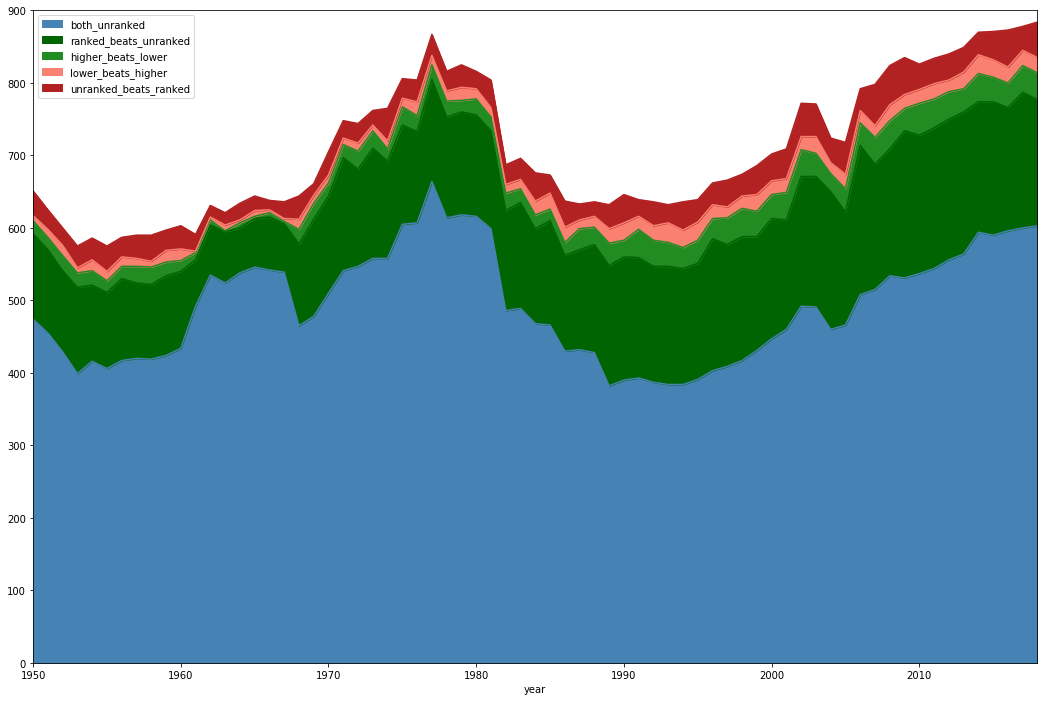

In [65]:
colors = ['steelblue', 'darkgreen', 'forestgreen', 'salmon', 'firebrick']
ax = ratios.groupby('year').sum().plot.area(figsize=(18,12), color=colors)
ax.set_ylim(0,900)


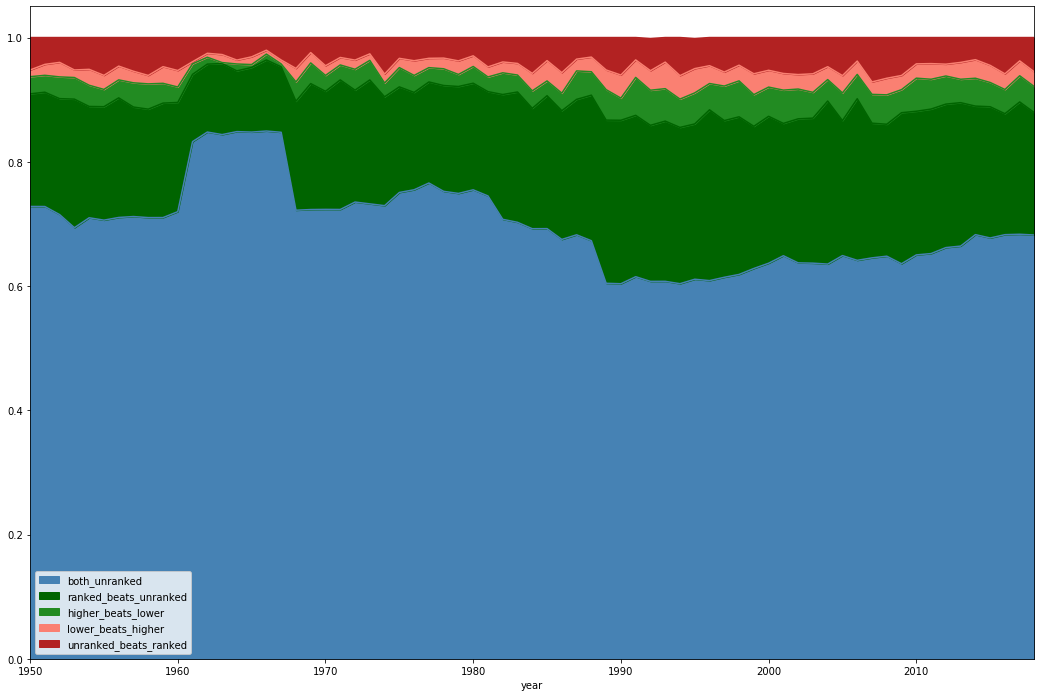

In [66]:
colors = ['steelblue', 'darkgreen', 'forestgreen', 'salmon', 'firebrick']
ax = ratios.groupby('year').mean().plot.area(figsize=(18,12), color=colors)



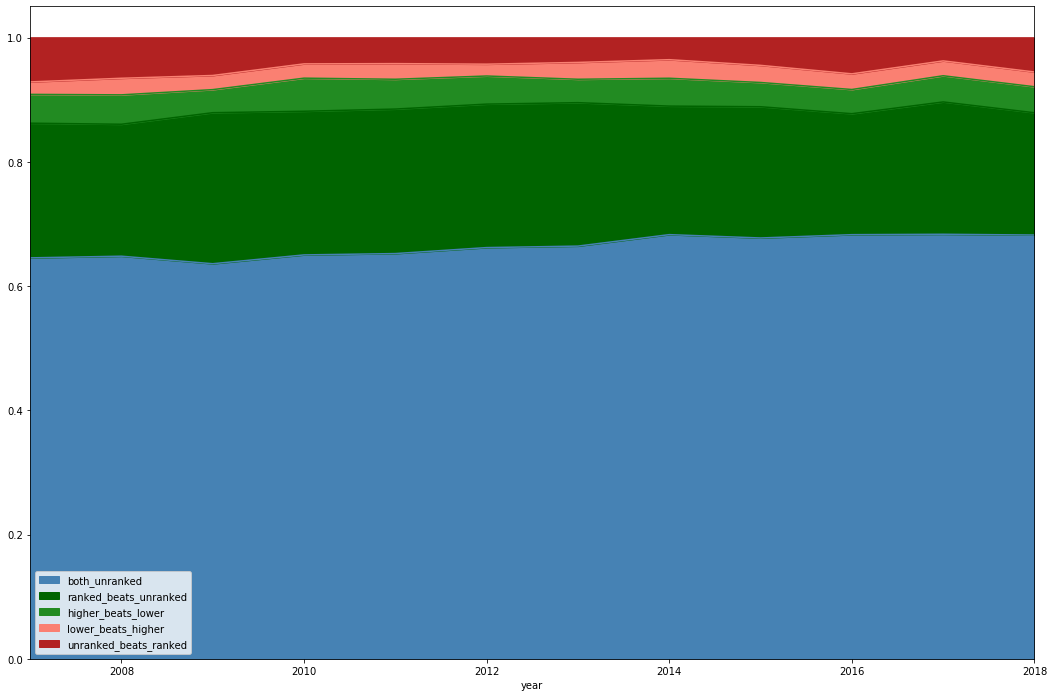

In [67]:
colors = ['steelblue', 'darkgreen', 'forestgreen', 'salmon', 'firebrick']
ax = ratios.loc[2007:2018].groupby('year').mean().plot.area(figsize=(18,12), color=colors)


In [68]:
ratios_years = ratios.groupby('year').sum()
ratios_years.loc[1950]

both_unranked            474.0
ranked_beats_unranked    118.0
higher_beats_lower        18.0
lower_beats_higher         7.0
unranked_beats_ranked     34.0
Name: 1950, dtype: float64

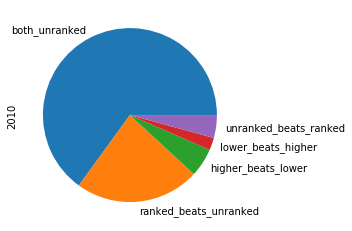

In [70]:
ratios_years.loc[2010].plot(kind='pie')

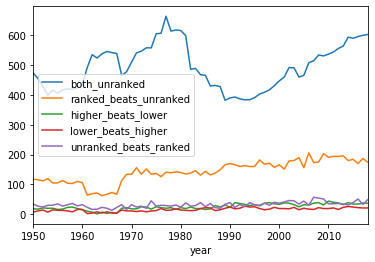

In [37]:
ratios_years.plot()
# need to do this as a stacked plot

## Some plots for relationships

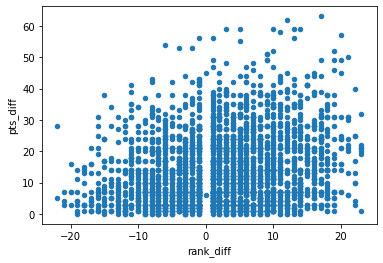

In [38]:
records.plot(x='rank_diff', y='pts_diff', kind='scatter')

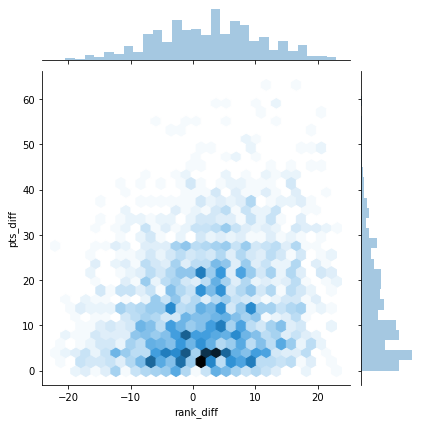

In [39]:
sns.jointplot(x='rank_diff', y='pts_diff', data=records, kind='hex')

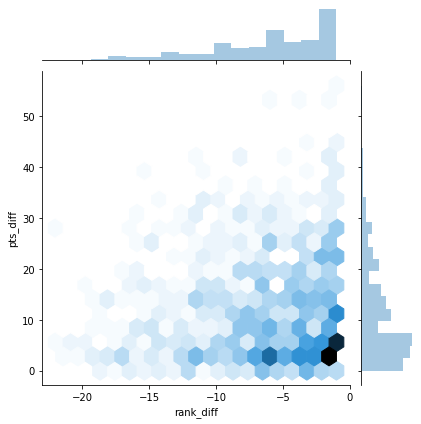

In [40]:
sns.jointplot(x='rank_diff', y='pts_diff', data=lower_beats_higher, kind='hex')

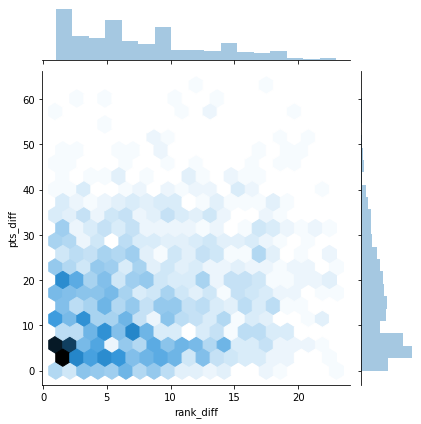

In [41]:
sns.jointplot(x='rank_diff', y='pts_diff', data=higher_beats_lower, kind='hex')

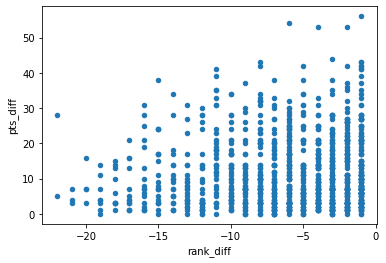

In [42]:
lower_beats_higher.plot(x='rank_diff', y='pts_diff', kind='scatter')

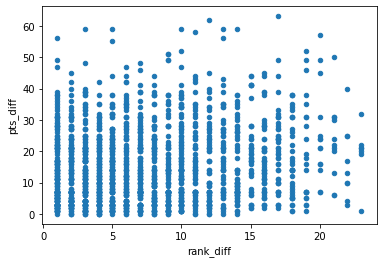

In [43]:
higher_beats_lower.plot(x='rank_diff', y='pts_diff', kind='scatter')

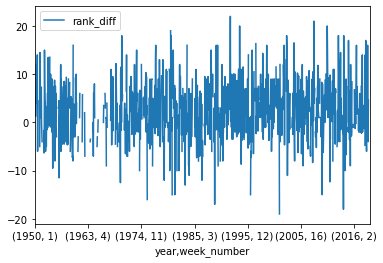

In [44]:
records.groupby(['year','week_number']).mean().plot(y='rank_diff')

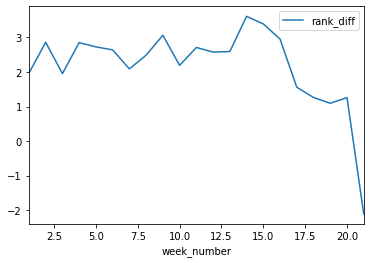

In [45]:
records.groupby('week_number').mean().plot(y='rank_diff')

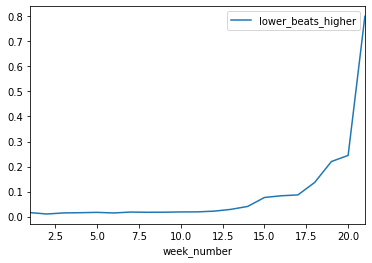

In [46]:
records.groupby('week_number').mean().plot(y='lower_beats_higher')

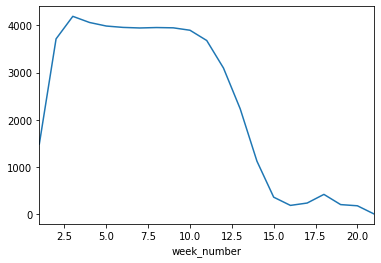

In [47]:
# total number of games per week
records.groupby('week_number').size().plot()

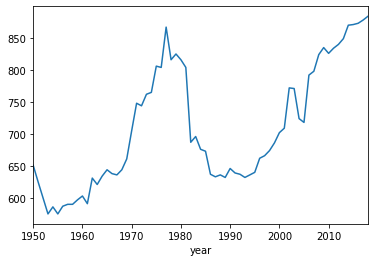

In [48]:
records.groupby('year').size().plot()

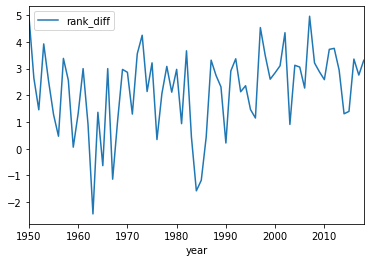

In [49]:
records.groupby('year').mean().plot(y='rank_diff')

In [50]:
records

winner_pts  loser_pts     game_date game_time game_day  \
year week_number row                                                           
1950 1           1          13.0       12.0  Sep 15, 1950       NaN      Fri   
                 2          14.0       13.0  Sep 16, 1950       NaN      Sat   
                 3          32.0        0.0  Sep 16, 1950       NaN      Sat   
                 4          56.0        0.0  Sep 16, 1950       NaN      Sat   
                 5           7.0        0.0  Sep 16, 1950       NaN      Sat   
...                          ...        ...           ...       ...      ...   
2018 21          880        27.0       24.0   Jan 1, 2019   1:00 PM      Tue   
                 881        40.0       32.0   Jan 1, 2019   1:00 PM      Tue   
                 882        28.0       23.0   Jan 1, 2019   5:00 PM      Tue   
                 883        28.0       21.0   Jan 1, 2019   8:45 PM      Tue   
                 884        44.0       16.0   Jan 7, 2019   8:00 PM      Mon   

                     game_loc  \
year week_number row            
1950 1           1          @   
                 2          @   
                 3        NaN   
                 4        NaN   
                 5        NaN   
...                       ...   
2018 21          880      NaN   
                 881      NaN   
                 882      NaN   
                 883      NaN   
                 884      NaN   

                                                                  notes  \
year week_number row                                                      
1950 1           1                                                  NaN   
                 2                                                  NaN   
                 3                                                  NaN   
                 4                                                  NaN   
                 5                                                  NaN   
...                                                                 ...   
2018 21          880  Citrus Bowl (Camping World Stadium - Orlando, ...   
                 881  Fiesta Bowl (State Farm Stadium - Glendale, Ar...   
                 882       Rose Bowl (Rose Bowl - Pasadena, California)   
                 883  Sugar Bowl (Mercedes-Benz Superdome - New Orle...   
                 884  College Football Championship (Levi's Stadium ...   

                      winner_home  winner_rank      winner_name  loser_rank  \
year week_number row                                                          
1950 1           1          False          NaN     Presbyterian         NaN   
                 2          False          NaN    Brigham Young         NaN   
                 3           True          NaN       Cincinnati         NaN   
                 4           True          NaN          Citadel         NaN   
                 5           True          NaN            Drake         NaN   
...                           ...          ...              ...         ...   
2018 21          880         True         16.0         Kentucky        13.0   
                 881         True         11.0  Louisiana State         7.0   
                 882         True          5.0       Ohio State         9.0   
                 883         True         14.0            Texas         6.0   
                 884         True          2.0          Clemson         1.0   

                                 loser_name  rank_diff  pts_diff  \
year week_number row                                               
1950 1           1                   Furman        NaN       1.0   
                 2              Idaho State        NaN       1.0   
                 3            Texas-El Paso        NaN      32.0   
                 4    Parris Island Marines        NaN      56.0   
                 5                   Denver        NaN       7.0   
...                                     ...        ...       ...   
201

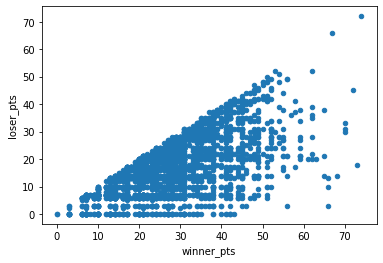

In [51]:
upsets.plot(x='winner_pts', y='loser_pts', kind='scatter')

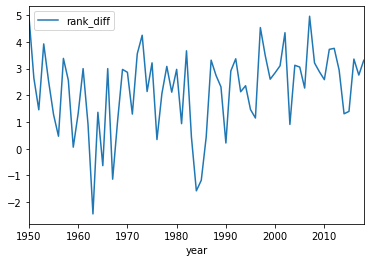

In [52]:
records.groupby('year').mean().plot(y='rank_diff')

In [53]:
records.groupby('year').mean().max()

winner_pts               38.566038
loser_pts                19.686140
winner_home               0.676259
winner_rank              12.897638
loser_rank               15.438776
rank_diff                 4.962264
pts_diff                 20.045991
both_unranked             0.849530
ranked_beats_unranked     0.274924
unranked_beats_ranked     0.071429
lower_beats_higher        0.042722
higher_beats_lower        0.061033
dtype: float64

In [54]:
records.groupby('year').mean().min()

winner_pts               22.064669
loser_pts                 7.617391
winner_home               0.585324
winner_rank               5.036145
loser_rank                5.100000
rank_diff                -2.444444
pts_diff                 14.044164
both_unranked             0.603715
ranked_beats_unranked     0.097792
unranked_beats_ranked     0.020376
lower_beats_higher        0.003384
higher_beats_lower        0.001610
dtype: float64

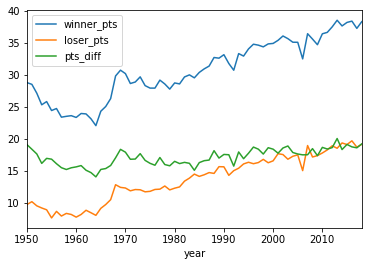

In [56]:
records.groupby('year').mean().plot(y=['winner_pts','loser_pts','pts_diff'])

### Teams earning and losing most upsets

In [58]:
records.head(2)

winner_pts  loser_pts     game_date game_time game_day  \
year week_number row                                                           
1950 1           1          13.0       12.0  Sep 15, 1950       NaN      Fri   
                 2          14.0       13.0  Sep 16, 1950       NaN      Sat   

                     game_loc notes  winner_home  winner_rank    winner_name  \
year week_number row                                                           
1950 1           1          @   NaN        False          NaN   Presbyterian   
                 2          @   NaN        False          NaN  Brigham Young   

                      loser_rank   loser_name  rank_diff  pts_diff  \
year week_number row                                                 
1950 1           1           NaN       Furman        NaN       1.0   
                 2           NaN  Idaho State        NaN       1.0   

                      both_unranked  ranked_beats_unranked  \
year week_number row                                         
1950 1           1             True                  False   
                 2             True                  False   

                      unranked_beats_ranked  lower_beats_higher  \
year week_number row                                              
1950 1           1                    False               False   
                 2                    False               False   

                      higher_beats_lower  
year week_number row                      
1950 1           1                 False  
                 2                 False

In [59]:
records.groupby('winner_name').sum().sort_values('rank_diff').dropna()

,winner_pts,loser_pts,winner_home,winner_rank,loser_rank,rank_diff,pts_diff,both_unranked,ranked_beats_unranked,unranked_beats_ranked,lower_beats_higher,higher_beats_lower
winner_name,,,,,,,,,,,,
Arkansas,15050.0,6023.0,342.0,2640.0,837.0,-63.0,9027.0,216.0,197.0,38.0,21.0,13.0
Virginia,10680.0,4975.0,244.0,1242.0,616.0,-62.0,5705.0,255.0,60.0,24.0,9.0,4.0
Boston College,12782.0,5649.0,271.0,976.0,441.0,-57.0,7133.0,346.0,46.0,21.0,8.0,3.0
Purdue,11463.0,5672.0,241.0,1459.0,600.0,-55.0,5791.0,229.0,85.0,36.0,12.0,9.0
Mississippi,13791.0,5541.0,312.0,1706.0,804.0,-44.0,8250.0,266.0,125.0,37.0,16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Nebraska,21226.0,7311.0,380.0,3304.0,1348.0,475.0,13915.0,128.0,350.0,16.0,16.0,74.0
Southern California,18010.0,7526.0,337.0,3354.0,1791.0,531.0,10484.0,119.0,294.0,32.0,38.0,82.0
Alabama,19153.0,6325.0,425.0,3144.0,1839.0,665.0,12828.0,115.0,343.0,24.0,43.0,93.0


In [60]:
records[2008:2018].groupby('winner_name').sum().sort_values('rank_diff')

,winner_pts,loser_pts,winner_home,winner_rank,loser_rank,rank_diff,pts_diff,both_unranked,ranked_beats_unranked,unranked_beats_ranked,lower_beats_higher,higher_beats_lower
winner_name,,,,,,,,,,,,
Oklahoma,7.0,7.0,True,8.0,0.0,0.0,0.0,False,True,False,False,False
Pennsylvania,13.0,7.0,True,0.0,0.0,0.0,6.0,True,False,False,False,False
Princeton,20.0,19.0,True,0.0,0.0,0.0,1.0,True,False,False,False,False
Rice,28.0,7.0,False,14.0,0.0,0.0,21.0,False,True,False,False,False
Richmond,13.0,7.0,True,0.0,0.0,0.0,6.0,True,False,False,False,False
Rutgers,20.0,13.0,True,0.0,0.0,0.0,7.0,True,False,False,False,False
San Jose State,27.0,21.0,False,0.0,0.0,0.0,6.0,True,False,False,False,False
South Carolina,19.0,0.0,False,0.0,0.0,0.0,19.0,True,False,False,False,False
Texas,28.0,7.0,True,17.0,0.0,0.0,21.0,False,True,False,False,False


In [61]:
records.groupby('winner_name').mean().sort_values('rank_diff').dropna()

,winner_pts,loser_pts,winner_home,winner_rank,loser_rank,rank_diff,pts_diff,both_unranked,ranked_beats_unranked,unranked_beats_ranked,lower_beats_higher,higher_beats_lower
winner_name,,,,,,,,,,,,
Nevada,39.386243,20.449735,0.624339,18.888889,9.500000,-16.000000,18.936508,0.947090,0.042328,0.005291,0.005291,0.000000
Tulane,29.835766,15.120438,0.660584,16.714286,12.642857,-13.000000,14.715328,0.901460,0.047445,0.047445,0.003650,0.000000
Rutgers,29.222222,12.355014,0.639566,18.555556,13.600000,-12.000000,16.867209,0.926829,0.046070,0.024390,0.002710,0.000000
Iowa State,29.605769,13.288462,0.660256,19.823529,12.304348,-11.666667,16.317308,0.881410,0.044872,0.064103,0.006410,0.003205
Bowling Green State,31.469945,14.535519,0.546448,22.750000,17.400000,-11.000000,16.934426,0.967213,0.019126,0.010929,0.002732,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Ohio State,33.427169,12.603928,0.641571,7.377953,12.058824,5.933824,20.823241,0.140753,0.608838,0.027823,0.052373,0.170213
Cincinnati,30.393048,13.716578,0.681818,15.041667,18.285714,6.000000,16.676471,0.909091,0.053476,0.026738,0.000000,0.010695
Army,30.668622,12.879765,0.788856,8.368421,12.125000,6.000000,17.788856,0.865103,0.087977,0.023460,0.005865,0.017595


In [62]:
records.groupby('loser_name').mean().sort_values('rank_diff').dropna()

,winner_pts,loser_pts,winner_home,winner_rank,loser_rank,rank_diff,pts_diff,both_unranked,ranked_beats_unranked,unranked_beats_ranked,lower_beats_higher,higher_beats_lower
loser_name,,,,,,,,,,,,
Utah State,33.004988,14.892768,0.673317,13.446154,12.000000,-7.000000,18.112219,0.835411,0.159601,0.002494,0.002494,0.000000
Northern Illinois,31.592233,14.511327,0.656958,12.034483,18.833333,-4.000000,17.080906,0.893204,0.087379,0.012945,0.003236,0.003236
Central Florida,33.794118,18.198529,0.698529,12.206897,16.000000,-4.000000,15.595588,0.779412,0.205882,0.007353,0.007353,0.000000
Tulsa,33.104326,15.676845,0.674300,10.826087,18.666667,-3.000000,17.427481,0.819338,0.173028,0.005089,0.002545,0.000000
Boise State,34.261905,20.392857,0.642857,16.312500,16.944444,-1.125000,13.869048,0.690476,0.095238,0.119048,0.047619,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...
Pennsylvania,27.167568,9.697297,0.448649,10.263158,15.875000,10.000000,17.470270,0.875676,0.081081,0.021622,0.000000,0.021622
South Florida,31.181818,15.737374,0.585859,15.357143,17.230769,11.000000,15.444444,0.606061,0.262626,0.111111,0.000000,0.020202
Fresno State,34.017794,18.078292,0.661922,14.238095,20.150000,11.333333,15.939502,0.790036,0.138790,0.060498,0.000000,0.010676


In [63]:
records.groupby('loser_name').count().sort_values('rank_diff').dropna()

,winner_pts,loser_pts,game_date,game_time,game_day,game_loc,notes,winner_home,winner_rank,winner_name,loser_rank,rank_diff,pts_diff,both_unranked,ranked_beats_unranked,unranked_beats_ranked,lower_beats_higher,higher_beats_lower
loser_name,,,,,,,,,,,,,,,,,,
Abilene Christian,21,21,21,7,21,0,4,21,0,21,0,0,21,21,21,21,21,21
Northern Colorado,16,16,16,4,16,1,2,16,3,16,0,0,16,16,16,16,16,16
Northern Arizona,63,63,63,5,63,11,2,63,4,63,0,0,63,63,63,63,63,63
Northeastern,12,12,12,0,12,0,0,12,2,12,0,0,12,12,12,12,12,12
North Texas,364,364,364,40,364,110,21,364,48,364,1,0,364,364,364,364,364,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Notre Dame,252,252,252,24,252,103,30,252,140,252,139,84,252,252,252,252,252,252
Oklahoma,195,195,195,15,195,60,31,195,122,195,120,85,195,195,195,195,195,195
Ohio State,182,182,182,9,182,72,31,182,102,182,140,89,182,182,182,182,182,182


### Last 10 years

In [64]:
records.loc[2008:2018]

winner_pts  loser_pts     game_date game_time game_day  \
year week_number row                                                           
2008 1           1          48.0       14.0  Aug 28, 2008       NaN      Thu   
                 2          42.0       17.0  Aug 28, 2008       NaN      Thu   
                 3          31.0       12.0  Aug 28, 2008       NaN      Thu   
                 4          40.0        7.0  Aug 28, 2008       NaN      Thu   
                 5          35.0        3.0  Aug 28, 2008       NaN      Thu   
...                          ...        ...           ...       ...      ...   
2018 21          880        27.0       24.0   Jan 1, 2019   1:00 PM      Tue   
                 881        40.0       32.0   Jan 1, 2019   1:00 PM      Tue   
                 882        28.0       23.0   Jan 1, 2019   5:00 PM      Tue   
                 883        28.0       21.0   Jan 1, 2019   8:45 PM      Tue   
                 884        44.0       16.0   Jan 7, 2019   8:00 PM      Mon   

                     game_loc  \
year week_number row            
2008 1           1        NaN   
                 2        NaN   
                 3        NaN   
                 4        NaN   
                 5        NaN   
...                       ...   
2018 21          880      NaN   
                 881      NaN   
                 882      NaN   
                 883      NaN   
                 884      NaN   

                                                                  notes  \
year week_number row                                                      
2008 1           1                                                  NaN   
                 2                                                  NaN   
                 3                                                  NaN   
                 4                                                  NaN   
                 5                                                  NaN   
...                                                                 ...   
2018 21          880  Citrus Bowl (Camping World Stadium - Orlando, ...   
                 881  Fiesta Bowl (State Farm Stadium - Glendale, Ar...   
                 882       Rose Bowl (Rose Bowl - Pasadena, California)   
                 883  Sugar Bowl (Mercedes-Benz Superdome - New Orle...   
                 884  College Football Championship (Levi's Stadium ...   

                      winner_home  winner_rank       winner_name  loser_rank  \
year week_number row                                                           
2008 1           1           True          NaN        Ball State         NaN   
                 2           True          NaN           Buffalo         NaN   
                 3           True          NaN  Central Michigan         NaN   
                 4           True          NaN        Cincinnati         NaN   
                 5           True          NaN       Connecticut         NaN   
...                           ...          ...               ...         ...   
2018 21          880         True         16.0          Kentucky        13.0   
                 881         True         11.0   Louisiana State         7.0   
                 882         True          5.0        Ohio State         9.0   
                 883         True         14.0             Texas         6.0   
                 884         True          2.0           Clemson         1.0   

                            loser_name  rank_diff  pts_diff  both_unranked  \
year week_number row                                                         
2008 1           1        Northeastern        NaN      34.0           True   
                 2       Texas-El Paso        NaN      25.0           True   
                 3    Eastern Illinois        NaN      19.0           True   
                 4    Eastern Kentucky        NaN      33.0           True   
                 5             Hofstra        NaN      32.0       